# ASSIGNMENT 1

**NOME:** Christian

**COGNOME:** Uccheddu

**MATRICOLA:** 800428

Per prima cosa vengono importate le librerie necessarie in cui vengono anche stampate le relative versione in modo che sia tutto riproducibile

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

print("Pandas version:",pd.__version__)
print("Geoandas version:",gpd.__version__)
print("Matplotlib version:",matplotlib.__version__)

Pandas version: 1.2.3
Geoandas version: 0.8.1
Matplotlib version: 3.3.4


Importiamo quindi lo shapefile contenente le informazioni sui comuni in Lombardia nel 2012. Printiamo inoltre la prima osservazione per vedere come è fatto.

In [19]:
shapefile = "./REGIONE_LOMBARDIA/Comuni_2012.shp"
comuni = gpd.read_file(shapefile)
print(comuni.iloc[0])

CLASSREF                   1e9d907b-5ca6-413c-a9a9-323051719aa5
BELFIORE                                                   H870
COD_ISTAT                                              03020056
NOME_COM                              SAN GIACOMO DELLE SEGNATE
COD_PRO                                                      20
NOME_PRO                                                MANTOVA
COD_CMO                                                    None
NOME_CMO                                                   None
COD_ASL                                                       7
NOME_ASL                                                MANTOVA
COD_REG                                                      03
NOME_REG                                              LOMBARDIA
SHAPE_AREA                                         16636352.943
SHAPE_LEN                                          23465.214759
geometry      POLYGON ((659751.4091499997 4979669.499609999,...
Name: 0, dtype: object


Selezioniamo solo i comuni appartenenti alla provincia di Milano e mostriamone un rapido plot

<AxesSubplot:>

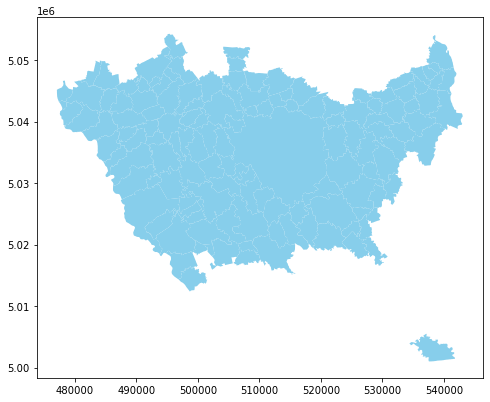

In [28]:
milano = comuni[comuni.NOME_PRO=='MILANO']
milano.plot(color = "skyblue", figsize = (8,8))

Importiamo inoltre il file relativo alla popolazione presente in ogni comune della lombardia sia del 2011 che del 2014. Questo dato è fondamentale in quanto:

$$density=\frac{N_{abitanti}}{Area}$$

Dove l'Area viene presa dal primo file e il numero di abitanti viene preso da questo file.

In [21]:
tab_pop = pd.read_csv('./REGIONE_LOMBARDIA/Lombardia_Pop2011_2014.csv',sep=',',encoding= 'unicode_escape')
print(tab_pop.head())

    Codice                Comune  Cod_prov Provincia  Pop2011  Pop2014
0  3017064               CORZANO        17   BRESCIA   1358.0   1427.0
1  3017167               RUDIANO        17   BRESCIA   5861.0   5822.0
2  3017201  VILLANUOVA SUL CLISI        17   BRESCIA   5855.0   5778.0
3  3017084                  IRMA        17   BRESCIA    152.0    128.0
4  3017102     MANERBA DEL GARDA        17   BRESCIA   4985.0   5290.0


Selezioniamo ora solo i comuni appartenenti alla provincia di milano e rinominiamo l'attributo **Codice** in modo che abbia lo stesso nome del relativo attributo nel dataframe precedente e da poterli mergiare in modo più agevole

In [22]:
tab_pop = tab_pop.loc[tab_pop['Provincia'] == 'MILANO']
tab_pop.rename(columns={'Codice':'COD_ISTAT'}, inplace=True)

Facciamo quindi il merge tra i due dataframe utilizzando l'attributo **COD\_ISTAT** come chiave. Stampiamo inoltre la prima riga del dataframe per vedere che contenga tutti i campi che ci interessano.

In [26]:
tab_pop.COD_ISTAT=tab_pop.COD_ISTAT.astype(int)
milano.COD_ISTAT=milano.COD_ISTAT.astype(int)
milano_density = milano.merge(tab_pop, on='COD_ISTAT')
print(milano_density.iloc[0])

CLASSREF                   109334ca-566a-46f4-8830-fa1f79665a45
BELFIORE                                                   L773
COD_ISTAT                                               3015236
NOME_COM                                                VERNATE
COD_PRO                                                      15
NOME_PRO                                                 MILANO
COD_CMO                                                    None
NOME_CMO                                                   None
COD_ASL                                                      10
NOME_ASL                                               MILANO 2
COD_REG                                                      03
NOME_REG                                              LOMBARDIA
SHAPE_AREA                                        14676883.3089
SHAPE_LEN                                          24400.493214
geometry      POLYGON ((505377.5921999998 5020478.00575, 505...
Comune                                  

Calcoliamo ora la densità in tutti i comuni in provincia di Milano utilizzando:

$$density=\frac{N_{abitanti}}{Area}$$

>Ricordiamo inoltre che l'Area nello shapefile è definita in $m^2$. Per convenzione però le densità di popolazioni vengono espresse in $\frac{peop}{km^2}$. Proprio per questo motivo passiamo da $m^2$ a $km^2$ dividendo l'Area per $10^6$.

In [24]:
milano_density['density2011'] = round(milano_density['Pop2011']/(milano_density['geometry'].area/(10**6)),2)

Plottiamo quindi la densità di popolazione nell'Area in provincia di Milano usando una color map che permetta di risaltare le differenze tra i comuni. Come ci si aspettava infatti tutte le zone più densamente popolate sono quelle che si trovano a ridosso di Milano e la densità decresce allontanandosi da quest'ultima.

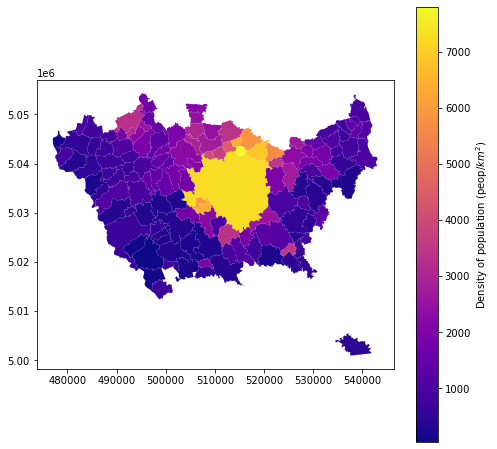

In [25]:
ax =  milano_density.plot(column = milano_density['density2011'], cmap = 'plasma', legend=True,
            legend_kwds={'label': r'Density of population (peop/$km^2$)'}, figsize = (8,8))
ax.figure.savefig("milano.png", dpi = 400, bbox_inches='tight')